In [95]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [96]:
def fact(n):
    if n==1 or n==0:
        return 1

    else :
        return n*fact(n-1)

In [97]:
# 1. X ~ B(4,0.5)

n = np.arange(4)
p =0.5
np2 = len(n)*p
x = [i for i in range(19)]
a ,b = [] , []
for x_1 in x:
    a.append(len(list(itertools.combinations(n , x_1))) *(math.pow(p , x_1)) *(math.pow(1-p , len(n) - x_1)))
    #print(  math.exp(np2) )
    b.append( ((np2 ** x_1) *  math.exp(-np2)) / (fact(x_1))  )

A = pd.DataFrame([a , b])
A= A.T
A

,0,1
0,0.0625,1.353353e-01
1,0.2500,2.706706e-01
2,0.3750,2.706706e-01
3,0.2500,1.804470e-01
4,0.0625,9.022352e-02
5,0.0000,3.608941e-02
6,0.0000,1.202980e-02
7,0.0000,3.437087e-03
8,0.0000,8.592716e-04
9,0.0000,1.909493e-04


Text(16, 0.29, 'X~ B(4,0.5)\nX~ B(4,0.5)')

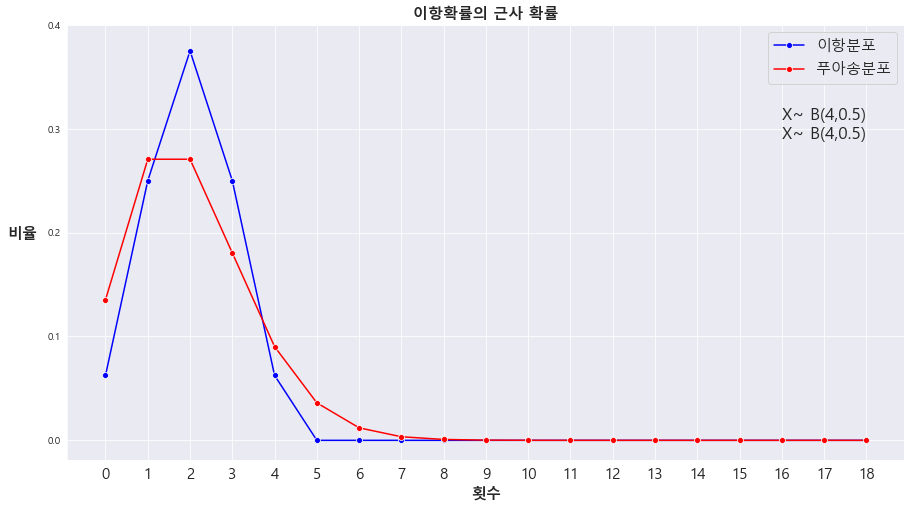

In [98]:
fig = plt.figure(figsize = (15,8))

ax = sns.lineplot(x= np.arange(19) , y = A.iloc[:,0] ,color='blue', # 색상
                  linestyle='-', # 라인 스타일
                  marker='o') # 마커)
ax.set_yticks(np.arange(0,0.41 , 0.1))
ax.set_xticks(np.arange(19))
ax.set_title('이항확률의 근사 확률' , fontsize = 15 , fontweight = 'bold')
ax.set_xlabel('횟수', fontsize = 15 , fontweight = 'bold')
ax.set_ylabel('비율' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=25)
ax.set_xticklabels(x, fontsize=15) #set_xticklabels(축별 이름 , font 크기)

ax2 = sns.lineplot(x= np.arange(19) , y = A.iloc[:,1] ,color='r', # 색상
                  linestyle='-', # 라인 스타일
                  marker='o') # 마커)
ax2.set_yticks(np.arange(0,0.41 , 0.1))
plt.legend(labels = ['이항분포' , '푸아송분포'] , fontsize = 15)
ax.text(16 , 0.29  , '{0:10s}\n{0:10s}'.format('X~ B(4,0.5)' , 'X~ P(2)' ),fontsize=17)

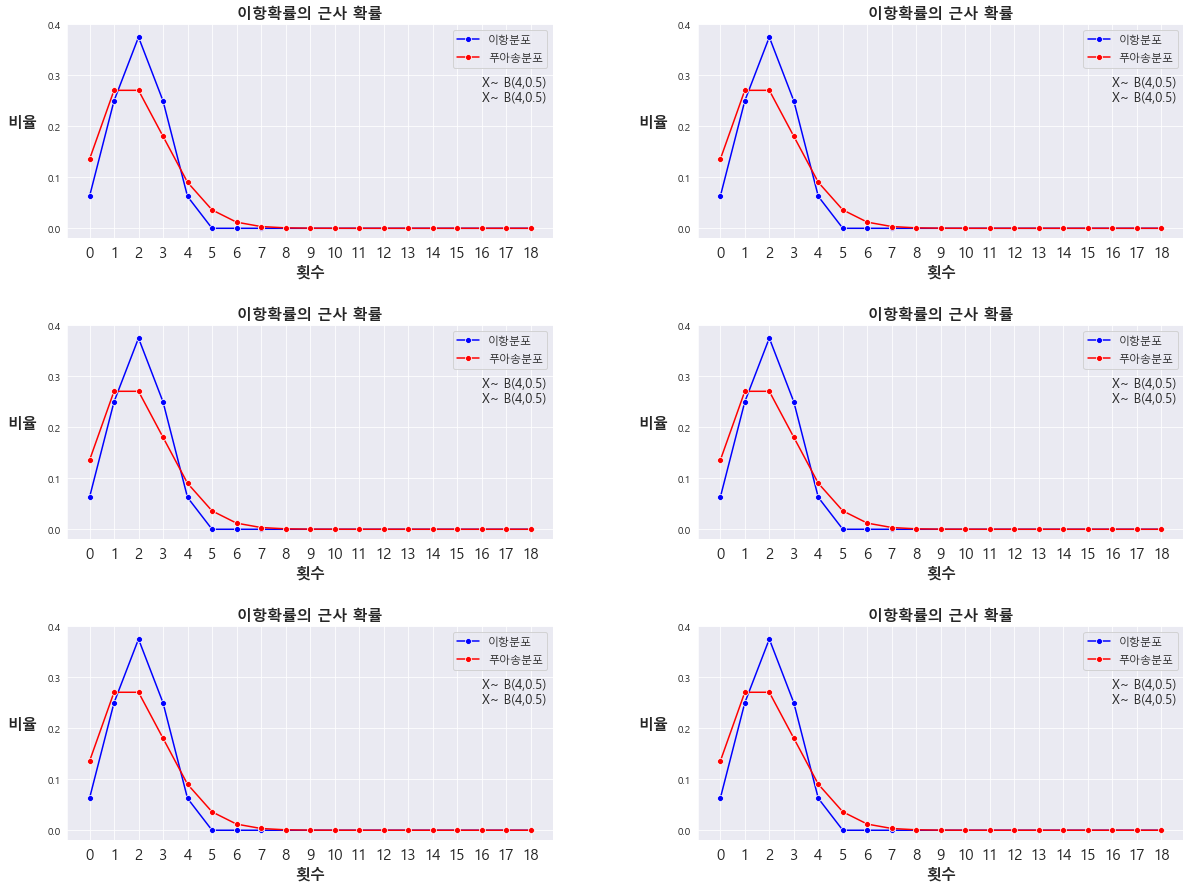

In [99]:
fig , axes = plt.subplots(3,2) #3행 2열
fig.set_size_inches((20, 15)) #격자 크기 설정

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.41) #가로방향은 wspace , 세로방향은 hspace
for i in range(3):
    for j in range(2):
        ax = sns.lineplot(x= np.arange(19) , y = A.iloc[:,0] ,color='blue', # 색상
                          linestyle='-', # 라인 스타일
                          marker='o'  ,ax = axes[i,j]) # 마커)
        ax.set_yticks(np.arange(0,0.41 , 0.1))
        ax.set_xticks(np.arange(19))
        ax.set_title('이항확률의 근사 확률' , fontsize = 15 , fontweight = 'bold')
        ax.set_xlabel('횟수', fontsize = 15 , fontweight = 'bold')
        ax.set_ylabel('비율' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=25)
        ax.set_xticklabels(x, fontsize=15) #set_xticklabels(축별 이름 , font 크기)


        ax2 = sns.lineplot(x= np.arange(19) , y = A.iloc[:,1] ,color='r', # 색상
                           linestyle='-', # 라인 스타일
                           marker='o' ,ax = axes[i,j]) # 마커)
        ax2.set_yticks(np.arange(0,0.41 , 0.1))
        ax.legend(labels = ['이항분포' , '푸아송분포'] , fontsize = 11)
        ax.text(16 , 0.25  , '{0:10s}\n{0:10s}'.format('X~ B(4,0.5)' , 'X~ P(2)' ),fontsize=13)
plt.show()

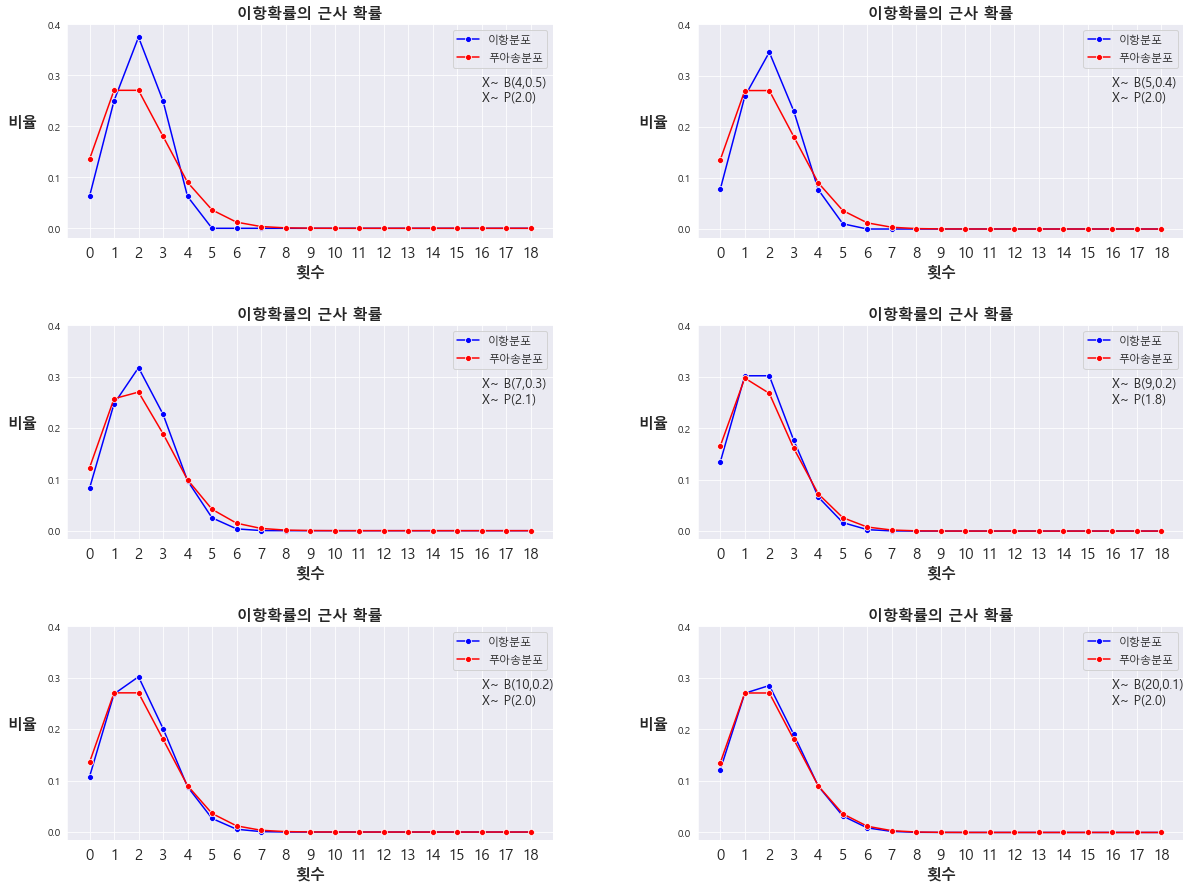

In [104]:
fig , axes = plt.subplots(3,2) #3행 2열
fig.set_size_inches((20, 15)) #격자 크기 설정

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.41) #가로방향은 wspace , 세로방향은 hspace
t = 0
# n_list = [4,10,50,100,101,102]
# p_list = [0.5 , 0.2, 0.04 , 0.02 , 0.04 , 0.002]
n_list = [4,5,7,9,10,20]
p_list = [0.5 ,0.4, 0.3 , 0.2 , 0.2 , 0.1]
for i in range(3):
    for j in range(2):


        n = np.arange(n_list[t])
        p = p_list[t]
        np2 = len(n)*p
        x = [i for i in range(19)]
        a ,b = [] , []
        for x_1 in x:
            a.append(len(list(itertools.combinations(n , x_1))) *(math.pow(p , x_1)) *(math.pow(1-p , len(n) - x_1))) #이항분포 공식

            b.append( ((np2 ** x_1) *  math.exp(-np2)) / (fact(x_1))  ) # 푸아송 공식

        A = pd.DataFrame([a , b])
        A= A.T


        ax = sns.lineplot(x= np.arange(19) , y = A.iloc[:,0] ,color='blue', # 색상
                          linestyle='-', # 라인 스타일
                          marker='o'  ,ax = axes[i,j]) # 마커)
        ax.set_yticks(np.arange(0,0.41 , 0.1))
        ax.set_xticks(np.arange(19))
        ax.set_title('이항확률의 근사 확률' , fontsize = 15 , fontweight = 'bold')
        ax.set_xlabel('횟수', fontsize = 15 , fontweight = 'bold')
        ax.set_ylabel('비율' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=25)
        ax.set_xticklabels(x, fontsize=15) #set_xticklabels(축별 이름 , font 크기)


        ax2 = sns.lineplot(x= np.arange(19) , y = A.iloc[:,1] ,color='r', # 색상
                           linestyle='-', # 라인 스타일
                           marker='o' ,ax = axes[i,j]) # 마커)
        ax2.set_yticks(np.arange(0,0.41 , 0.1))
        ax.legend(labels = ['이항분포' , '푸아송분포'] , fontsize = 11)
        ax.text(16 , 0.25  , '{}\n{}'.format('X~ B({},{})'.format(n_list[t] , p_list[t]) , 'X~ P({})'.format(np2) ),fontsize=13)
        t+=1 #리스트 값들
plt.show()

In [115]:
f_x = math.pow(5,3) * math.exp(-5) / fact(3)
f_x

0.140

In [120]:

f_x = 0
n = 30
p = 0.3
xx = 4
myu = n * p
for x in range(xx+1):
    f_x += math.pow(myu,x) * math.exp(-myu) / fact(x)
f_x

0.055

In [121]:
f_x = math.pow(myu,3) * math.exp(-myu) / fact(3)
f_x

0.015

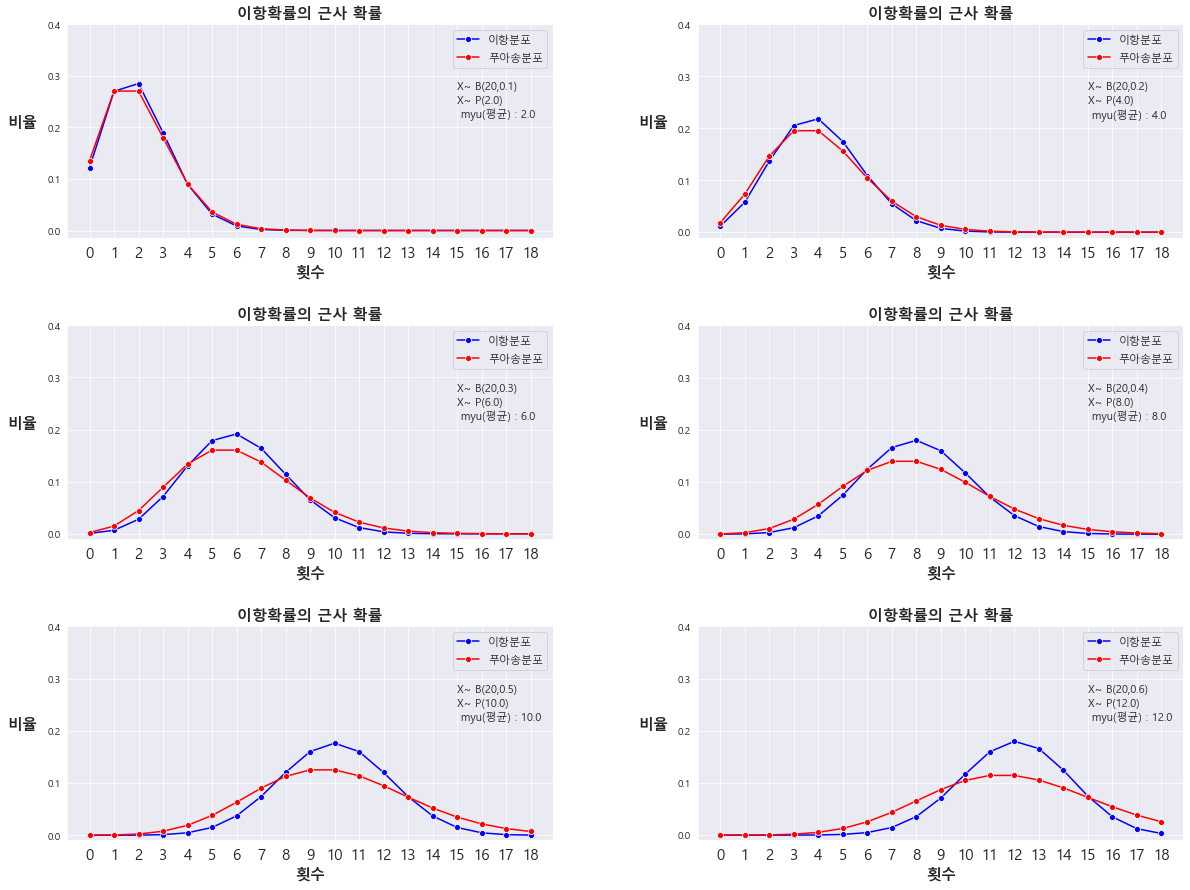

In [134]:
fig , axes = plt.subplots(3,2) #3행 2열
fig.set_size_inches((20, 15)) #격자 크기 설정

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.41) #가로방향은 wspace , 세로방향은 hspace
t = 0
# n_list = [4,10,50,100,101,102]
# p_list = [0.5 , 0.2, 0.04 , 0.02 , 0.04 , 0.002]
n_list = [20,20,20,20,20,20]
p_list = np.arange(0.1 , 0.61 , 0.1).tolist()
for i in range(3):
    for j in range(2):


        n = np.arange(n_list[t])
        p = p_list[t]
        np2 = round(len(n)*p,2)
        x = [i for i in range(19)]
        a ,b = [] , []
        for x_1 in x:
            a.append(len(list(itertools.combinations(n , x_1))) *(math.pow(p , x_1)) *(math.pow(1-p , len(n) - x_1))) #이항분포 공식

            b.append( ((np2 ** x_1) *  math.exp(-np2)) / (fact(x_1))  ) # 푸아송 공식

        A = pd.DataFrame([a , b])
        A= A.T


        ax = sns.lineplot(x= np.arange(19) , y = A.iloc[:,0] ,color='blue', # 색상
                          linestyle='-', # 라인 스타일
                          marker='o'  ,ax = axes[i,j]) # 마커)
        ax.set_yticks(np.arange(0,0.41 , 0.1))
        ax.set_xticks(np.arange(19))
        ax.set_title('이항확률의 근사 확률' , fontsize = 15 , fontweight = 'bold')
        ax.set_xlabel('횟수', fontsize = 15 , fontweight = 'bold')
        ax.set_ylabel('비율' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=25)
        ax.set_xticklabels(x, fontsize=15) #set_xticklabels(축별 이름 , font 크기)


        ax2 = sns.lineplot(x= np.arange(19) , y = A.iloc[:,1] ,color='r', # 색상
                           linestyle='-', # 라인 스타일
                           marker='o' ,ax = axes[i,j]) # 마커)
        ax2.set_yticks(np.arange(0,0.41 , 0.1))
        ax.legend(labels = ['이항분포' , '푸아송분포'] , fontsize = 11)
        ax.text(15 , 0.22  , '{}\n{}\n myu(평균) : {}'.format('X~ B({},{})'.format(n_list[t] , round(p_list[t] ,2)) , 'X~ P({})'.format(np2)  , np2),fontsize=11)
        t+=1 #리스트 값들
plt.show()

In [139]:
print((math.pow(36 , 2) -1) / 12)

print( (36**2 -1) / 12)

print( 36 **2 )

107.91666666666667
107.91666666666667
1296


In [137]:
print(7/36)

0.19444444444444445


In [154]:
X = np.arange(1, 10)

p = 0.5
P = []
for i in X:
    P.append( (p) * ((1-p)**(i-1)) )

A = pd.DataFrame([P] , columns = X)
A.index =['P(X = x)']
A.columns.names = ['X']
A

X,1,2,3,4,5,6,7,8,9
P(X = x),0.5,0.25,0.125,0.0625,0.03125,0.015625,0.007812,0.003906,0.001953


0.5
0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625
0.001953125


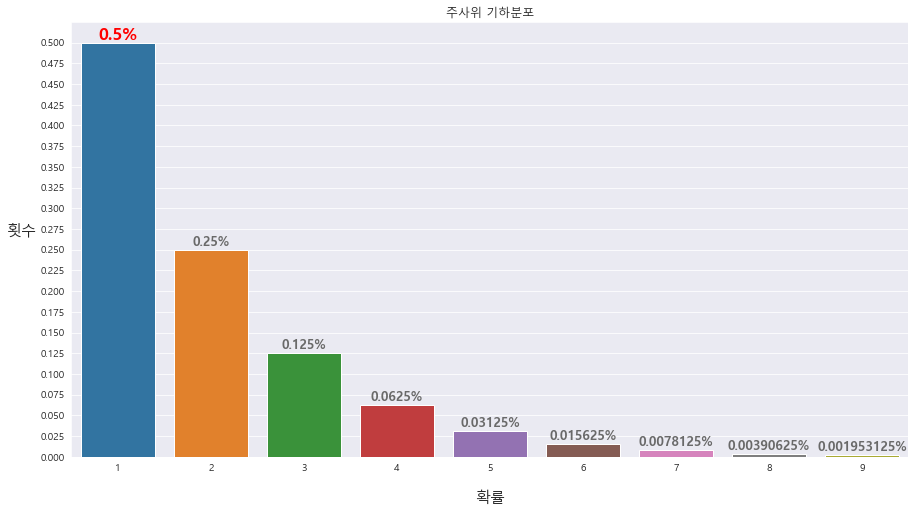

In [155]:
fig = plt.figure(figsize  = (15,8))

ax = sns.barplot(x= X, y = A.loc['P(X = x)'])
ax.set_title('주사위 기하분포')
ax.set_xlabel('확률' , rotation = 0 , fontsize= 15 , labelpad=18)
ax.set_ylabel('횟수', rotation = 0 , fontsize = 15 , labelpad=18)
ax.set_yticks(np.arange(0,0.51 , 0.025))

for i,txt in enumerate(A.loc['P(X = x)']):
    b = txt
    print(b)
    if  b == max(A.loc['P(X = x)']):
        ax.text(i, b+0.004, str(txt)+'%' , ha='center' , color = 'red' , fontweight = 'bold' , fontsize=17)
        #어디 막대, 막대기의 위쪽에
    else:
        ax.text(i, b+0.005, str(txt)+'%' , ha='center' , color = 'dimgray' , fontsize=13 , fontweight = 'bold')

In [156]:
p = 0.1
q = 1 - p
p_x = 0
for i in range(5,8):
    p_x += p * (math.pow(q, i-1))
print(p_x)

0.17780310000000002


In [157]:
print(1/0.058)

17.241379310344826


In [158]:
print(2 * (6/10))
print(6 * (2/10) * (1 - (2/10) ) *( (10-6) / (10-1) ))

1.2
0.42666666666666675


In [161]:
a =len(list(itertools.combinations(np.arange(6) , 2)))
b= len(list(itertools.combinations(np.arange(10) , 2)))
print(a/b)
print(b)

0.3333333333333333
45


In [163]:
print( 4 * 4/10)
print(4 * (4/9) * (1 - 4/9) * ( (9 -4) / (9-1) ))

1.6
0.6172839506172839


In [164]:
print(len(list(itertools.combinations(np.arange(9) , 4))))

126


In [165]:
b = len(list(itertools.combinations(np.arange(10) , 6)))*(math.pow(0.6 , 6)) *(math.pow(0.4 , 4))
print(b)

0.25082265600000003


In [166]:
b = len(list(itertools.combinations(np.arange(20) , 2)))*(math.pow(0.1 , 2)) *(math.pow(0.9 , 18))
print(b)

0.2851798070642985


In [ ]:
p = 0.8

